<h1 align=center> PCA In Depth </h1>

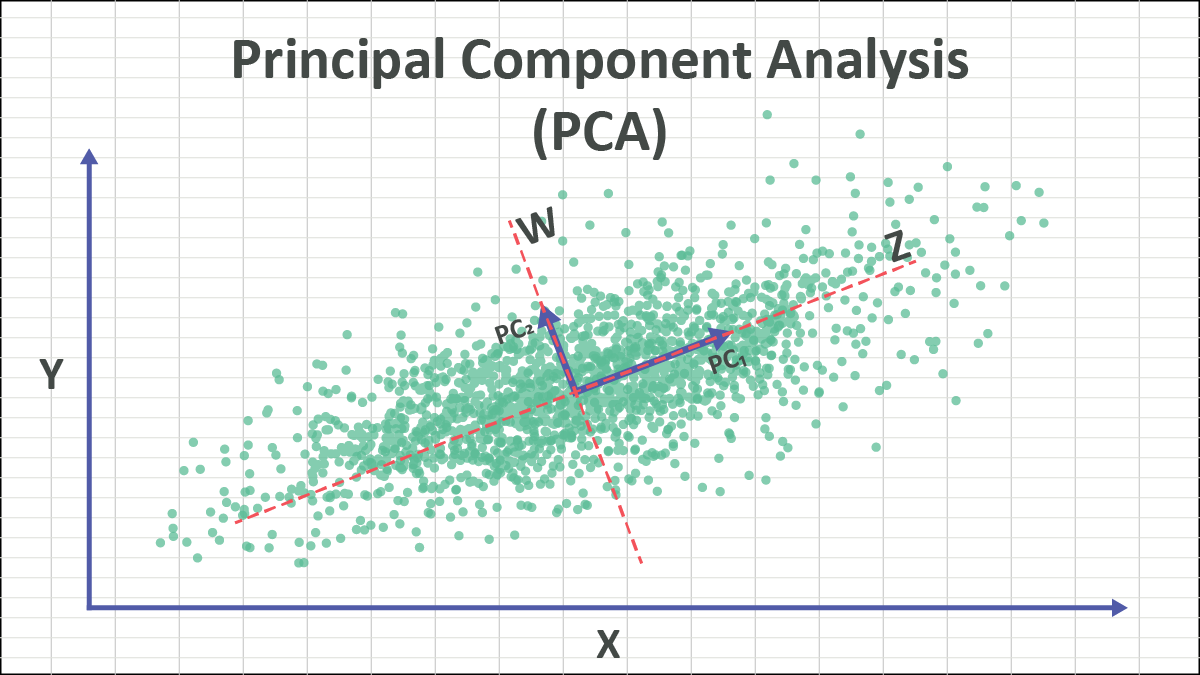

- PCA stands for principal components analysis
- Unsupervised learning algorithm
- PCA is a dimensionality reduction technique
- Require feature scaling
- Filter noisy dataset
- Improve model performance
- Non-parametric statistic technique

### **How does PCA work?**

→ PCA is a powerful tool for reducing the dimensionality of data while preserving its essential information. The goal is to get the best principle components which capture maximum variance.

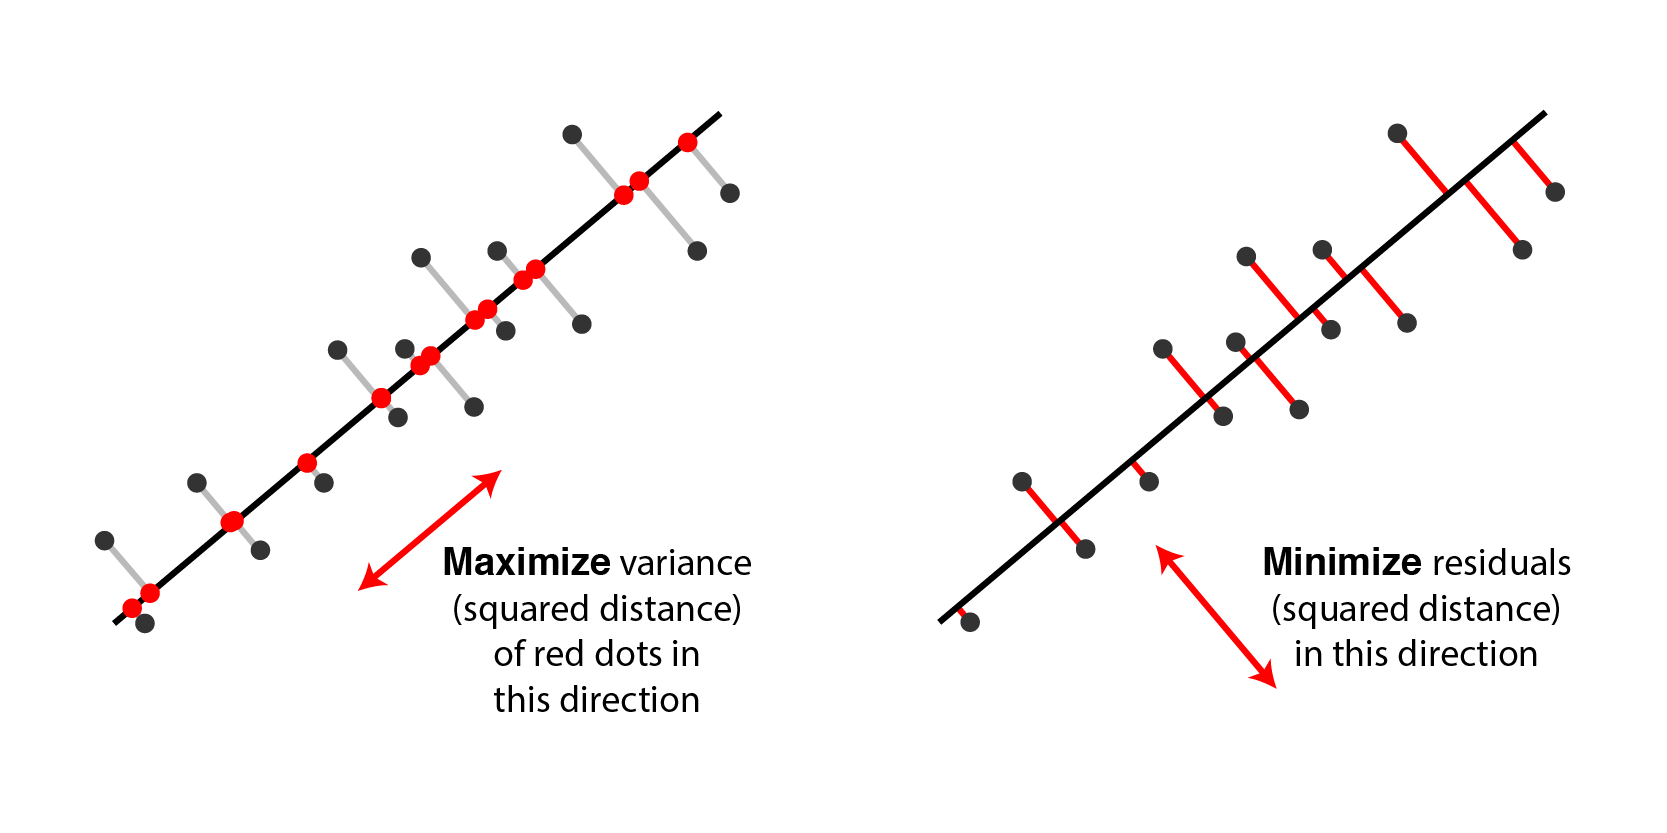

- Given a dataset with *m* observations and *n* features, PCA calculates the covariance matrix of the data
- It then finds the eigenvectors and eigenvalues of this covariance matrix
- The eigenvectors represent the directions (principal components) of maximum variance in the data, and the corresponding eigenvalues represent the magnitude of this variance along each eigenvector
- By sorting the eigenvectors based on their corresponding eigenvalues in descending order, PCA identifies the most significant principal components

### **Steps In PCA:**

1. **Standardization**: Scale the features to have a mean of 0 and a standard deviation of 1 (optional but recommended).
2. **Compute Covariance Matrix**: This captures how the features vary together.
3. **Compute Eigenvectors and Eigenvalues**: Eigenvectors represent the directions of greatest variance, and eigenvalues tell you how much variance each eigenvector explains.
4. **Select Principal Components**: Choose the top *k* eigenvectors based on their corresponding eigenvalues to form the new feature subspace.
5. **Projection**: Project the original data onto the new feature subspace formed by the selected eigenvectors. Or project the original data points onto the new principal component axes.

### Practical Example

- The table below displays scores on math, English, and art tests for 5 students

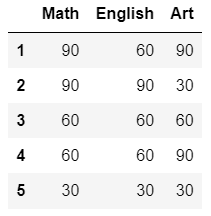

**Step1- Compute Covariance Matrix:**

- formula:

$$
cov(X,Y) =\frac{1}{n} \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})
$$

- cov(X,Y): covariance between X and Y
- X, Y: features X and Y
- **x̄, ȳ:** mean of feature X and Y

- Below is our matrix A which represent our above data in matrix format

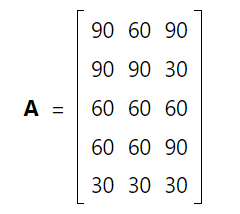

- When we compute covariance matrix for the above matrix A, we got:

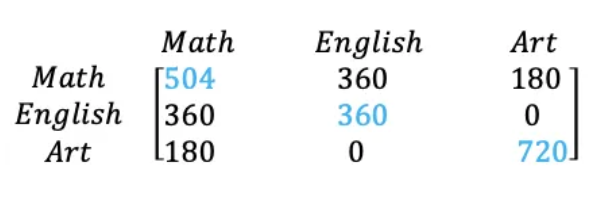

Few points that can be noted here is :

- Shown in *Blue* along the diagonal, we see the variance of scores for each test
- The art test has the biggest variance (720)
- The English test, the smallest (360)
- So we can say that art test scores have more variability than English test scores
- The covariance is displayed in black in the off-diagonal elements of the matrix **A**
- The covariance between math and English is positive (360)
- The covariance between math and art is positive (180)
- The covariance between English and art, however, is zero. This means there tends to be no predictable relationship between the movement of English and art scores

**Step2-** **Compute Eigenvectors and Eigenvalues**:

- *Let **A** be a square matrix, **ν** a vector and **λ** a scalar that satisfies **A**ν **= λ**ν, then **λ** is called eigenvalue associated with eigenvector **ν** of **A**.*

$$
Av = \lambda v\\ det(A-\lambda I)=0 \\ after \;computing \; we\;got:\;\\ {-\lambda ^3} + 1584{\lambda ^2}-641520{\lambda}+25660800 = 0\\ where \;Eignvalues:\\ {\lambda_1} \approx 44.81966\\ {\lambda_2} \approx 629.11039\\ {\lambda_3} \approx 910.06995\\ and \;Eigenvectors:\\ v_1 \approx \begin {pmatrix} -3.75100 \\ 4.28441 \\ 1\end{pmatrix} \\v_2 \approx \begin {pmatrix} -0.50494\\-0.67548\\1\end{pmatrix} \\ v_3 \approx\begin {pmatrix} 1.05594\\0.69108\\1\end{pmatrix} 
$$

**Step3:**  **S**orting the eigenvectors based on their corresponding eigenvalues in descending order, and choose the top *k* eigenvectors based on their corresponding eigenvalues to form the new feature subspace.

`Note`: The lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.

- Sorting eigenvalues in decreasing order

$$
\begin {pmatrix} 910.06995\\629.11039\\44.81966\end{pmatrix} 
$$

- For this example, our goal is to reduce 3-dimensional feature space to a 2-dimensional feature space
- So eigenvectors corresponding to two maximum eigenvalues are:

$$
w = \begin {bmatrix} 1.05594 & -0.50494\\0.69108 & -0.67548\\1 & 1\end{bmatrix}
$$

**Step4- Projection or Transform the samples onto the new subspace:** In the last step, we use the 3x2 dimensional matrix ***W*** that we just computed to transform our samples onto the new subspace via the equation ***y = W′ × x*** where ***W′*** is the *transpose* of the matrix ***W.***

**Pros:**

- **Reduced complexity:** Makes data easier to visualize, manage, and interpret by reducing the number of features.
- **Improved algorithm performance:** Many machine learning algorithms struggle with high-dimensional data. PCA reduces training time and improves the accuracy of some algorithms by reducing irrelevant features.
- **Reduced redundancy:** Eliminates redundant features, focusing on the unique information each piece of data provides. This can be especially helpful when dealing with datasets with a lot of correlated features.
- **Fast and efficient:** PCA is a well-established technique with efficient implementations in many programming languages.

**Cons:**

- **Information loss:** PCA discards information in the process of dimensionality reduction. There's a trade-off between the number of features retained and the amount of information preserved.
- **Assumes linearity:** PCA works best when the relationships between features are linear. It may not be effective if the data has complex non-linear relationships.
- **Interpretability of new features:** The principal components (PCs) created by PCA can be difficult to interpret in the context of the original features.

In [2]:
from sklearn.decomposition import PCA
import numpy as np


X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]
